In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy
import skimage.color
import skimage.io

In [2]:
import colour # https://colour.readthedocs.io/

In [3]:
def absorbance_to_transmittance(absorbance, name='transmittance'):
    """convert absorbance data to transmittance data
    
    # inputs
    absorbance - a `pandas.Series` of absorbance values
    name - name of the new Series ('Transmittance' by default)

    # returns
    `pandas.Series` of transmittance values
    """
    transmittance = np.power(10.0,-absorbance.values)
    return pd.Series(data=transmittance, index=absorbance.index, name=name)

In [4]:
def read_absorbance_csv_as_transmittance(fname, name="transmittance"):
    """read CSV file with absorbance data, convert to transmittance
    
    # inputs
    fname - filename to read
    name - name of the new Series

    # returns
    `colour.SpectralDistribution` of transmittance values
    """
    absorbance = pd.read_csv(fname, names=["wavelength (nm)", "AU"], index_col=0).iloc[:,0]
    transmittance = absorbance_to_transmittance(absorbance=absorbance,name=name)
    return colour.SpectralDistribution(transmittance,name=name)

In [5]:
# Read the files we digitized from Goto et al. 2009, Figure 1a
hnb_Mg_0mM = read_absorbance_csv_as_transmittance("hnb_Mg_0mM.csv",name="HNB, Mg2+ 0 mM").align(colour.SpectralShape(350, 750, 1))
hnb_Mg_4mM = read_absorbance_csv_as_transmittance("hnb_Mg_4mM.csv",name="HNB, Mg2+ 4 mM").align(colour.SpectralShape(350, 750, 1))
hnb_Mg_7mM = read_absorbance_csv_as_transmittance("hnb_Mg_7mM.csv",name="HNB, Mg2+ 7 mM").align(colour.SpectralShape(350, 750, 1))
hnb_Mg_8mM = read_absorbance_csv_as_transmittance("hnb_Mg_8mM.csv",name="HNB, Mg2+ 8 mM").align(colour.SpectralShape(350, 750, 1))

<IPython.core.display.Javascript object>


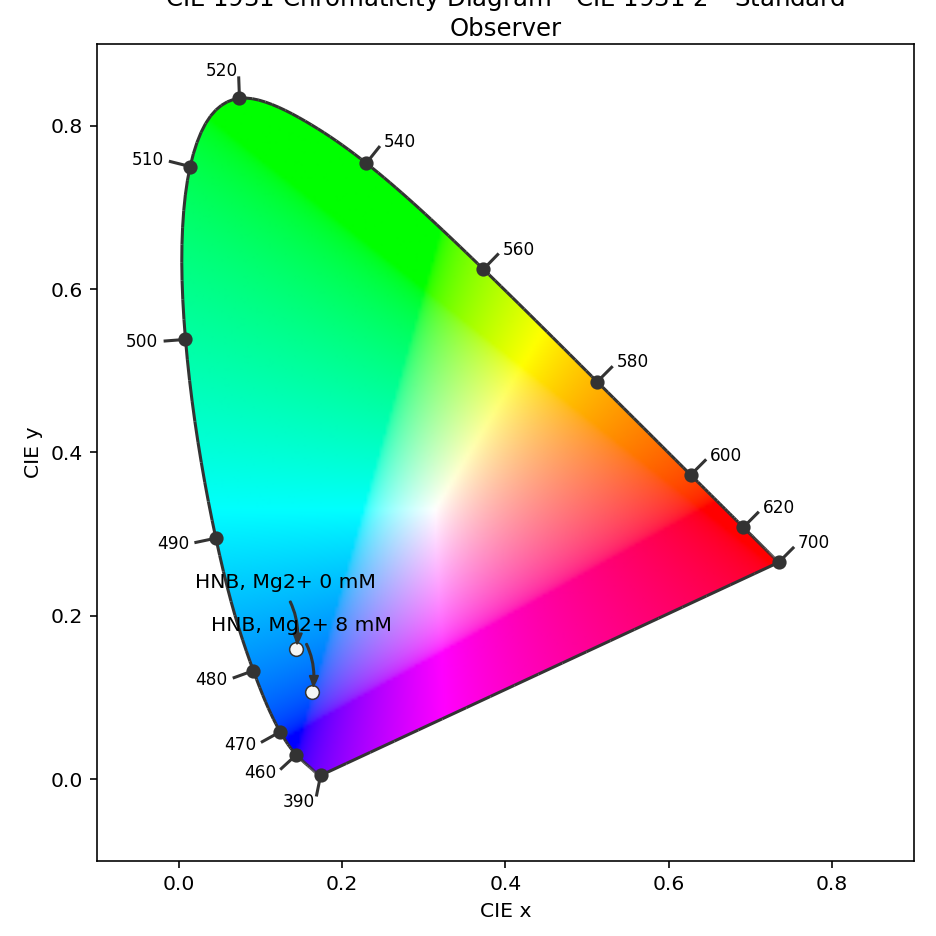

In [6]:
# Note that this assumes a uniform illuminant
fig,ax = colour.plotting.plot_sds_in_chromaticity_diagram_CIE1931([hnb_Mg_0mM, hnb_Mg_8mM])

<IPython.core.display.Javascript object>


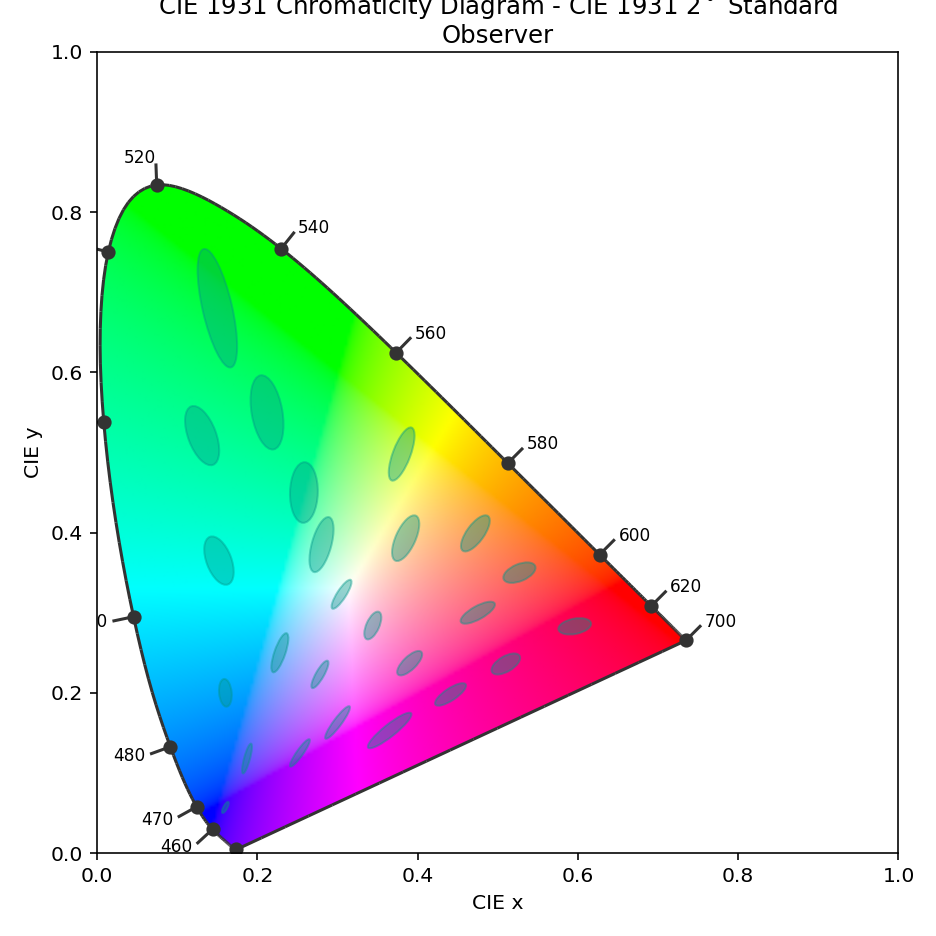

(<Figure size 640x640 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17d8d1aac18>)

In [16]:
colour.plotting.plot_ellipses_MacAdam1942_in_chromaticity_diagram_CIE1931()

# ---

<IPython.core.display.Javascript object>


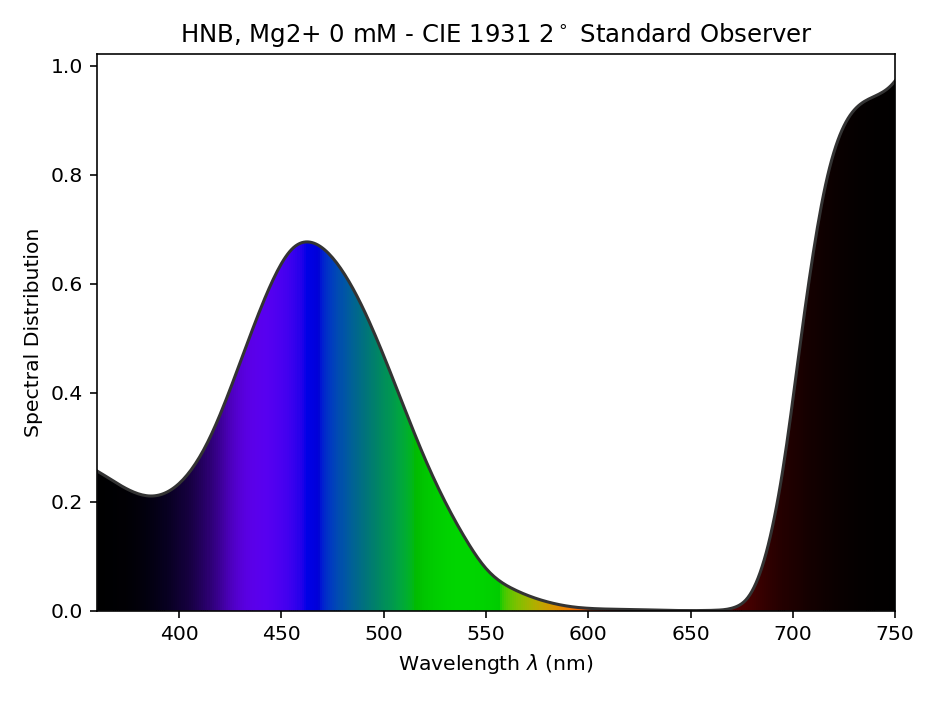

In [7]:
colour.plotting.plot_single_sd(hnb_Mg_0mM);

<IPython.core.display.Javascript object>


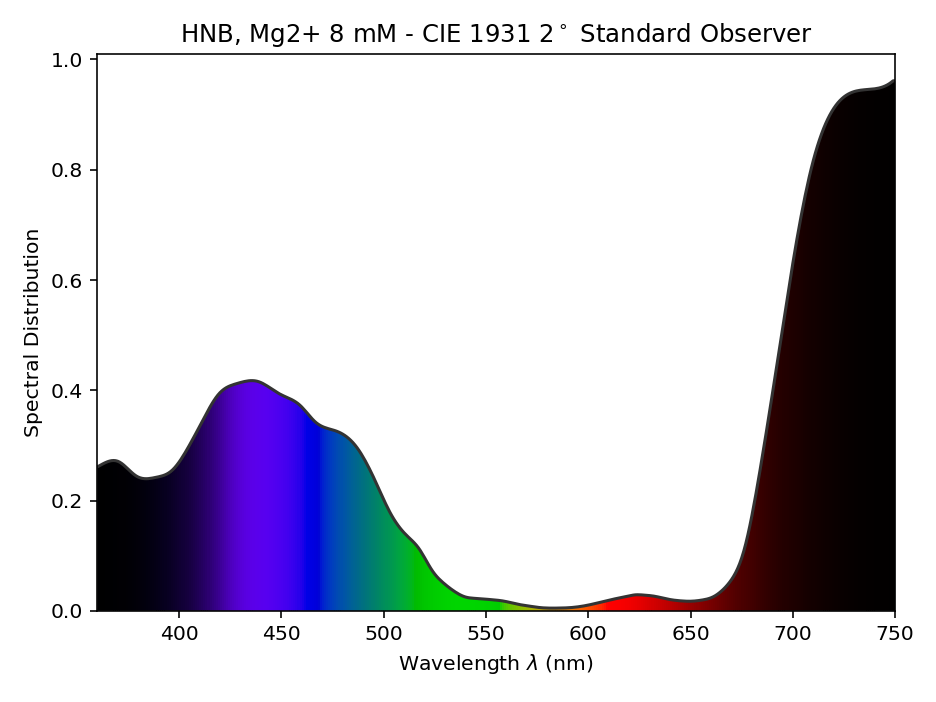

In [8]:
colour.plotting.plot_single_sd(hnb_Mg_8mM);

In [9]:
# tungsten and daylight illumination
A = colour.ILLUMINANTS_SDS['A']
D65 = colour.ILLUMINANTS_SDS['D65']

In [10]:
colour.sd_to_XYZ(hnb_Mg_8mM, illuminant=A)

array([  4.44927877,   3.84544985,  12.22133546])

In [11]:
colour.sd_to_XYZ(hnb_Mg_8mM, illuminant=D65)

array([  8.40750471,   5.67533453,  39.28881208])

In [12]:
colour.sd_to_XYZ(hnb_Mg_0mM, illuminant=A)

array([  5.38530136,   8.87525407,  20.2998966 ])

In [13]:
colour.sd_to_XYZ(hnb_Mg_0mM, illuminant=D65)

array([ 12.54809976,  13.90382902,  62.39253249])

In [14]:
# # fig, ax = colour.plotting.plot_chromaticity_diagram_CIE1931()
# neg_a = colour.sd_to_XYZ(hnb_Mg_8mM, illuminant=A)
# neg_d65 = colour.sd_to_XYZ(hnb_Mg_8mM, illuminant=D65)
# pos_a = colour.sd_to_XYZ(hnb_Mg_0mM, illuminant=A)
# pos_d65 = colour.sd_to_XYZ(hnb_Mg_0mM, illuminant=D65)
# colour.XYZ_to_RGB(neg_a)


In [15]:
# colour.XYZ_to_RGB?